##***LAB 10 : Naive Bayes Classifier***##

  1. Binary Classification using Naive Bayes Classifier
  
  2. Sentiment Analysis using Naive Bayes

  


In [1]:
import copy
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from math import exp, sqrt, pi
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix

matplotlib.rcParams['figure.figsize'] = (10, 7)

##Binary Classification using Naive Bayes Classifier##

Useful References : 
1. https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

2. https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/

3. https://towardsdatascience.com/implementing-naive-bayes-algorithm-from-scratch-python-c6880cfc9c41

**Note : The goal of this experiment is to perform and understand Naive Bayes classification by applying it on the below dataset, you can either fill in the below functions to get the result or you can create a class of your own using the above references to perform classification**

1. Generation of 2D training data

Text(0.5, 1.0, 'Data visualization')

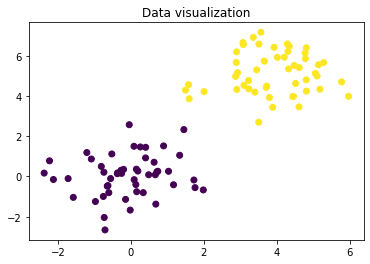

In [2]:
mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')


### Class for Naive bayes classifier

In [3]:
class NBC:
  def __init__(self):
    self.data = None
    self.label = None
    self.summary = None
  
  def fit(self, data, label):
    self.data = data
    self.label = label
    self.summary = self.get_variables()
  
  def class_dictionary(self):
    class_dict = {}
    for i in range(self.data.shape[0]):
      if class_dict.get(self.label[i]):
        class_dict[self.label[i]].append(self.data[i])
      else:
        class_dict[self.label[i]] = [self.data[i]]

    return class_dict
  
  def get_variables(self):
    var_dict = {}

    class_dict = self.class_dictionary()
    labels = list(class_dict.keys())
    for label in labels:
      label_means = np.mean(np.array(class_dict[label]), axis=0)
      label_stds = np.std(np.array(class_dict[label]), axis=0)
      N = np.array(class_dict[label]).shape[0]
      dim = np.array(class_dict[label]).shape[1]
      res = []
      for i in range(dim):
        temp = (label_means[i], label_stds[i], N)
        res.append(temp)
      
      var_dict[label] = copy.deepcopy(res)
    return var_dict
  
  def calculate_probability(self, x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 + 1e-15 )))
    return (1 / (sqrt(2 * pi) * stdev + 1e-15)) * exponent
  
  def calculate_class_probabilities(self, row):
    
    ## Write your code here to calculate the class probabilities
    '''
    You can use the above function (calculate_probability) to calculate probability of an individual data point belonging to a particular class 
    based on mean and std deviation of that class
    
    '''
    probabilities = dict()
    summary = self.summary
    for label in summary:
      prob = 1
      for i in range(len(row)): prob *=self.calculate_probability(row[i], summary[label][i][0], summary[label][i][1])
      probabilities[label] = prob*summary[label][i][2]/self.data.shape[0]
        
    return probabilities
  
  def predict(self, test_data):
    labels = []
    for data in test_data:
      max_label = None
      max_prob = -float('inf')
      curr_pred = self.calculate_class_probabilities(data)
      probs = []
      for l in curr_pred: probs.append(curr_pred[l])
      labels.append(np.argmax(probs))
    return np.array(labels)

2.Split the Dataset by Class Values (Create a Dictionary)

In [4]:
nbc = NBC()
nbc.fit(data, label)
print("This is the class dictionary")
nbc.class_dictionary()

This is the class dictionary


{0.0: [array([-1.57668985, -1.03982262]),
  array([-2.22908837,  0.77738534]),
  array([-0.72944014, -2.04059601]),
  array([-0.60307093, -0.80613793]),
  array([-0.1988887,  0.351987 ]),
  array([-1.0823819 ,  0.86873075]),
  array([-0.64602276, -0.4827786 ]),
  array([-0.55301333, -0.10534224]),
  array([-0.97041435, -1.24566304]),
  array([ 0.34076762, -0.80512206]),
  array([1.45488724, 2.3318086 ]),
  array([-0.14322361, -1.13894247]),
  array([-0.70767693, -2.65891323]),
  array([ 0.09163132, -0.15950217]),
  array([-2.12241532, -0.15106366]),
  array([-0.36859122,  0.13876704]),
  array([ 1.9871582 , -0.67035913]),
  array([0.15313648, 0.36290063]),
  array([-1.71898891, -0.10582707]),
  array([0.49004011, 0.08445841]),
  array([ 1.73020468, -0.1749493 ]),
  array([-0.04321608,  2.57402376]),
  array([0.67183735, 0.084099  ]),
  array([0.40754152, 1.45065429]),
  array([1.3396092 , 1.05418816]),
  array([0.40455369, 0.92363786]),
  array([ 1.17081537, -0.41316892]),
  array([-0.

3. Calculate Mean, Std deviation and count for each column in a dataset

In [5]:
nbc.get_variables()

{0.0: [(-0.08143074021616499, 0.9927104621843587, 50),
  (0.05650317153356914, 1.0255393627439437, 50)],
 1.0: [(3.8912935273386937, 1.0208299436699904, 50),
  (5.136474984683965, 1.035467336214579, 50)]}

4. Test the model using some samples

Test Data Size :  20


Text(0.5, 1.0, 'Data visualization')

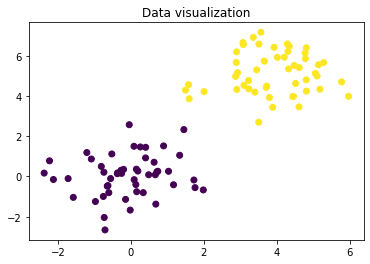

In [6]:
## Test Data Generation

mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,10)
data2=np.random.multivariate_normal(mean2,var,10)
test_data=np.concatenate((data1,data2))
y_test=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))
print('Test Data Size : ',test_data.shape[0])
plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')

Testing for a sample point

In [7]:
out = nbc.calculate_class_probabilities(test_data[0])
print('Class Probabilites for the first sample of test dataset : ')
print(out)

Class Probabilites for the first sample of test dataset : 
{0.0: 0.014197204018409904, 1.0: 8.332975086162472e-16}


**As seen above the class probability for the 1st sample is given, we can observe that probability is higher for class 0 than 1 and hence imply that this datapoint belongs to class 0**


Now Calculate the class probabilities for all the data points in the test dataset and calculate the accuracy by comparing the predicted labels with the true test labels


----------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

----------------------------------------------------------------------
Confusion Matrix


<AxesSubplot:>

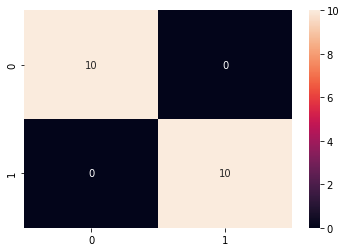

In [8]:
## Write your code here
y_pred = nbc.predict(test_data)

print("-"*70)
print("Classification Report")
print(classification_report(y_test, y_pred))

print("-"*70)
print("Confusion Matrix")
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True)

5. Use the Sci-kit Learn library to perform Gaussian Naive Bayes classifier on the above dataset, also report the accuracy and confusion matrix for the same

----------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

----------------------------------------------------------------------
Confusion Matrix


<AxesSubplot:>

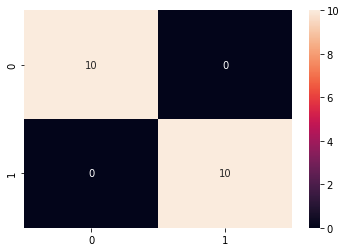

In [9]:
## Write your code here

clf = GaussianNB()
clf.fit(data, label)

y_pred = clf.predict(test_data)

print("-"*70)
print("Classification Report")
print(classification_report(y_test, y_pred))

print("-"*70)
print("Confusion Matrix")
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True)

##Sentiment Analysis using Naive Bayes Classifier##

Go through the following [article](https://www.analyticsvidhya.com/blog/2021/07/performing-sentiment-analysis-with-naive-bayes-classifier/) and implement the same 

**Keypoints** : 
  
  1. The link to the dataset is given in the above article, download the same to perform sentiment analysis

  2. Understanding how to deal with text data is very important since it requires a lot of preprocessing, you can go through this [article](https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/) if you are interested in learning more about it
  
  3. Split the dataset into train-test and train the model
  
  4. Report the accuracy metrics and try some sample prediction outside of those present in the dataset


**Note : The goal of this experiment is to explore a practical use case of Naive bayes classifier as well as to understand how to deal with textual data, you can follow any other open source implemetations of sentiment analysis using naive bayes also**

Other References : 

1. https://towardsdatascience.com/sentiment-analysis-introduction-to-naive-bayes-algorithm-96831d77ac91

2. https://gist.github.com/CateGitau/6608912ca92733036c090676c61c13cd

In [10]:
## Write your code here

url = 'https://raw.githubusercontent.com/Hrd2D/Sentiment-analysis-on-Google-Play-store-apps-reviews/master/google_play_store_apps_reviews_training.csv'
data = pd.read_csv(url)

data.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [11]:
X = data.review.to_numpy()
y = data.polarity.to_numpy()

X.shape, y.shape

((891,), (891,))

In [34]:
vector = CountVectorizer(stop_words='english')
X_features = vector.fit(X)
X_features = vector.transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.25, random_state=42)

## Using custom Naive Bayes Classifier

C:\Users\Shashank\AppData\Local\Temp\ipykernel_4916\1530596831.py:56: RuntimeWarning: overflow encountered in double_scalars
  for i in range(len(row)): prob *=self.calculate_probability(row[i], summary[label][i][0], summary[label][i][1])
C:\Users\Shashank\AppData\Local\Temp\ipykernel_4916\1530596831.py:56: RuntimeWarning: invalid value encountered in double_scalars
  for i in range(len(row)): prob *=self.calculate_probability(row[i], summary[label][i][0], summary[label][i][1])


----------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       158
           1       0.08      0.03      0.04        65

    accuracy                           0.62       223
   macro avg       0.38      0.45      0.40       223
weighted avg       0.51      0.62      0.55       223

----------------------------------------------------------------------
Confusion Matrix


<AxesSubplot:>

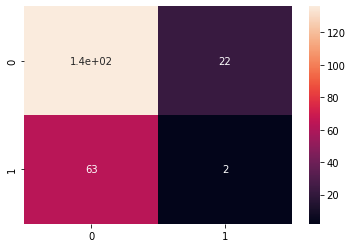

In [35]:
nbc = NBC()

nbc.fit(X_train, y_train)

y_pred = nbc.predict(X_test)

print("-"*70)
print("Classification Report")
print(classification_report(y_test, y_pred))

print("-"*70)
print("Confusion Matrix")
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True)

### Sklearn Library

----------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       158
           1       0.65      0.65      0.65        65

    accuracy                           0.79       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.79      0.79      0.79       223

----------------------------------------------------------------------
Confusion Matrix


<AxesSubplot:>

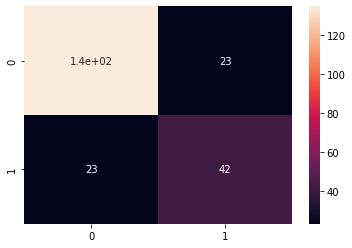

In [36]:
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("-"*70)
print("Classification Report")
print(classification_report(y_test, y_pred))

print("-"*70)
print("Confusion Matrix")
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True)

In [42]:
np.argmax(np.logical_and(y_pred==0, y_test==1))

11

In [41]:
stmt1 = "Very good app, i liked it a lot"
stmt2 = "Very bad bad bad"

X_val = vector.transform([stmt1, stmt2]).toarray()
y_val_pred = clf.predict(X_val)
y_val_pred

array([1, 1], dtype=int64)